# Fitting MFT $J_{ij}$

In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
autoreload 2

In [23]:
from clean_data import voting_data, C, pvec, pbin, J_diag_factor, S, Sinv, cvals, N, justices

In [64]:
import pandas as pd
import numpy as np
import fast
import scipy

In [158]:
def get_analytic_J(gamma):
    """ Returns the analytic solution for Jij given a gamma tuning term """
    jvals = [np.power(0.5 * (cq - gamma + sqrt((cq - gamma)**2 + 4 * gamma)), -1) for cq in cvals]
    J_prime = V@np.diag(jvals)@Vinv
    J = np.zeros((9,9))
    return(J_prime)

    factor = 0
    for i in range(N):
        for j in range(i+1, N):
            factor = sqrt(pvec[i] * (1-pvec[i]) * pvec[j] * (1-pvec[j]))
            J[i][j] = J_prime[i][j] / factor
            J[j][i] = J_prime[j][i] / factor

    return(J)

def ising_log_likelihood(state, J):
    return(-state@J@state)

def mft_log_likelihood(J, gamma):
    mft_term = 0.0
    for i in range(N):
        for j in range(i+1, N):
            mft_term += (J[i][j] * J[i][j]) * pvec[i] * (1-pvec[i]) * pvec[j] * (1-pvec[j])
    return(gamma * mft_term)

def my_chi_squared(gamma):
    J = get_analytic_J(gamma)
    start_state = np.random.choice([-1,1], size = N)
    
    #J = np.loadtxt("jij_sols.csv", delimiter=",")
    probs, all_states = fast.my_test_sample(gamma, start_state, J, 
                        num_samples = 16000)
    

    num_data_pts = 810

    chi = 0.0
    all_states_transpose = np.transpose((all_states + 1.0) / 2.0)
    for i in range(N):
        for j in range(i, N):
            err = pbin[i][j] * (1-pbin[i][j]) / num_data_pts
            pij_model = np.sum(all_states_transpose[i] * all_states_transpose[j] * probs)
            chi += (2 / (9 * 10)) * ((pbin[i][j] - pij_model) ** 2) / err
    return(chi)

In [32]:
J_correct = np.loadtxt("jij_sols.csv", delimiter=',')

In [7]:
my_chi_squared(0)

411.2211263170434

In [21]:
def plot_heatmap(J):
   # J_ = deepcopy(J)
    J_ = J
    if J_.shape != (9,9): J_ = J_.reshape((9,9))
    cm = sns.diverging_palette(248, 12, sep=1, n=256)
    sns.heatmap(J_, cmap=cm, xticklabels=justices, yticklabels=justices,  vmin=-1, vmax=1)

In [20]:
import seaborn as sns

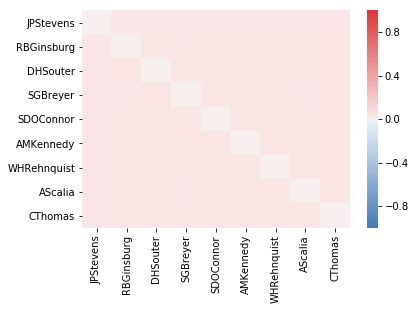

In [59]:
plot_heatmap(get_analytic_J(1e15))

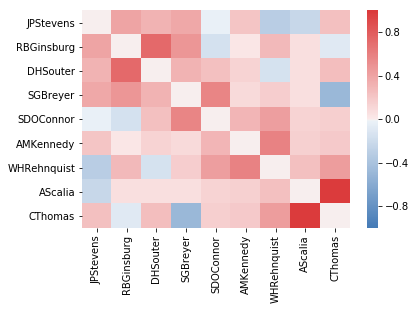

In [33]:
plot_heatmap(J_correct)

In [53]:
myf(200000000000)

211.38387074409735

In [40]:
myf(2060848.7340546646)

211.39592992598136

In [36]:
A.reshape(81)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
def myf(gamma):
    J = get_analytic_J(gamma)
    A = J - J_correct
    return(np.sum(A.reshape((81)))**2)
    

In [38]:
minimize_scalar(myf)

     fun: 211.39592992598136
    nfev: 75
     nit: 12
 success: True
       x: 2060848.7340546646

In [12]:
pd.DataFrame(get_analytic_J(6.675662770623722))

,0,1,2,3,4,5,6,7,8
0,0.000000,-0.346536,-0.337107,-0.321964,-0.203478,-0.200043,-0.150619,-0.120740,-0.147927
1,-0.346536,0.000000,-0.403895,-0.369332,-0.256364,-0.241199,-0.229422,-0.182956,-0.187282
2,-0.337107,-0.403895,0.000000,-0.359079,-0.281007,-0.263065,-0.236970,-0.210014,-0.218641
3,-0.321964,-0.369332,-0.359079,0.000000,-0.292776,-0.249786,-0.236063,-0.170550,-0.165617
4,-0.203478,-0.256364,-0.281007,-0.292776,0.000000,-0.342487,-0.364026,-0.298985,-0.306899
5,-0.200043,-0.241199,-0.263065,-0.249786,-0.342487,0.000000,-0.389715,-0.324613,-0.336640
6,-0.150619,-0.229422,-0.236970,-0.236063,-0.364026,-0.389715,0.000000,-0.379954,-0.393348
7,-0.120740,-0.182956,-0.210014,-0.170550,-0.298985,-0.324613,-0.379954,0.000000,-0.492097
8,-0.147927,-0.187282,-0.218641,-0.165617,-0.306899,-0.336640,-0.393348,-0.492097,0.000000


In [27]:
get_analytic_J(1.4733947977065398)

array([[ 0.        , -0.76257079, -0.72081903, -0.68742668, -0.28714821,
        -0.28688139, -0.11400787, -0.05671587, -0.14212807],
       [-0.76257079,  0.        , -0.89789406, -0.79629673, -0.39830148,
        -0.35406094, -0.31408066, -0.20006637, -0.19907738],
       [-0.72081903, -0.89789406,  0.        , -0.74720696, -0.46861911,
        -0.41253759, -0.31623352, -0.27344129, -0.28789164],
       [-0.68742668, -0.79629673, -0.74720696,  0.        , -0.54048779,
        -0.39360712, -0.34519097, -0.16240218, -0.12754838],
       [-0.28714821, -0.39830148, -0.46861911, -0.54048779,  0.        ,
        -0.66545904, -0.72658236, -0.53161002, -0.54311343],
       [-0.28688139, -0.35406094, -0.41253759, -0.39360712, -0.66545904,
         0.        , -0.81337498, -0.61324056, -0.63952301],
       [-0.11400787, -0.31408066, -0.31623352, -0.34519097, -0.72658236,
        -0.81337498,  0.        , -0.78337284, -0.81456684],
       [-0.05671587, -0.20006637, -0.27344129, -0.16240218, -0

In [26]:
minimize_scalar(my_chi_squared)

     fun: 80.00802441362829
    nfev: 27
     nit: 22
 success: True
       x: 1.4733947977065398

In [9]:
from scipy.optimize import minimize_scalar

In [7]:
# IT DOESN'T MATTER NOW, BUT MAKE SURE THAT YOU UPDATE WITH THE REGULARIZATION TERM

0